# Nanodegree Engenheiro de Machine Learning
## Introdução e Fundamentos
## Projeto 0: Explorando as Taxas de Sobrevivência do Titanic

Em 1912, o navio RMS Titanic colidiu com um iceberg na sua viagem inaugural e naufragou, resultando na morte da maioria dos passageiros e tripulação. Neste projeto introdutório, nós exploraremos um subconjunto do manifesto de passageiros do RMS Titanic para determinar quais atributos melhor estimam se alguém sobreviveu ou não. Para completar este projeto, você vai precisar implementar vários modelos condicionais e responder as questões abaixo. A submissão do seu projeto será avaliada baseada na implementação do código e sua resposta para as questões.
> **Dica:** Seções citadas, como esta, trarão instruções úteis de como navegar e utilizar o iPhython Notebook. 

# Começando
Para começar a trabalhar com os dados de passageiros do RMS Titanic, primeiramente, vamos precisar `import` a funcionalidade que precisamos, e carregar nossos dados dentro do DataFrame do `pandas`.  
Execute a célula de código abaixo para carregar nossos dados e exiba as poucas primeiras entradas (passageiros) para examiná-las utilizando a função `.head()`.
> **Dica:** Você pode executar a célula de código clicando nela e utilizando o atalho de teclado **Shift + Enter** ou **Shift + Return**. Outra maneira seria a célula de código ser executada utilizando o botão **Play** no hotbar depois de selecioná-la. As células Markdown (células de texto como esta) podem ser editadas com clique duplo, e salvas utilizando o mesmo atalho. [Markdown](http://daringfireball.net/projects/markdown/syntax) permite que você escreva textos simples e fáceis de ler que podem ser convertidos para HTML.

In [1]:
import numpy as np
import pandas as pd

# Código de visualização de dados do RMS Titanic 
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Carregar o dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Exibir as primeiras entradas dos dados do RMS Titanic
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dado uma amostra de dados do RMS Titanic, podemos ver vários atributos presente para cada passageiro do navio:
- **Survived**: Resultado da sobrevivência (0 = Não; 1 = Sim)
- **Pclass**: Classe socioeconômica (1 = Classe alta; 2 = Classe média; 3 = Classe baixa)
- **Name**: Nome do passageiro
- **Sex**: Gênero do passageiro
- **Age**: Idade do passageiro (Algumas entradas contêm `NaN`)
- **SibSp**: Número de irmãos e cônjuges de cada passageiro a bordo
- **Parch**: Número de pais ou filhos do passageiro
- **Ticket**: O número do tíquete do passageiro
- **Fare**: Tarifa paga pelo passageiro
- **Cabin**: O número do tíquete do passageiro (Algumas entradas contém `NaN`)
- **Embarque**: Portão de embarque do passageiro (C = Cherbourg; Q = Queenstown; S = Southampton)

Dado que estamos interessados no resultado da sobrevivência de cada passageiro ou tripulação, nós podemos retirar o atributo **Survived** desse conjunto de dados e armazená-lo como uma própria variável `outcomes` separada. Usaremos esses resultados para avaliar nossos modelos.  
Executar a célula de código abaixo e remova **Survived** dos atributos do conjunto de dados e armazene em `outcomes`.

In [2]:
# Armazenar 'Survived' em uma nova variável e remover do conjunto de dados
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Mostrar o novo conjunto de dados com 'Survived' removido
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A exata mesma amostra de dados do RMS Titanic agora mostra o atributo **Survived** removida do DataFrame. Note que `data` (os dados dos passageiros) e `outcomes` (os resultados de sobrevivência) agora estão *pareados*. Isso significa que para qualquer passageiro `data.loc[i]`, ele tem um resultado de sobrevivência `outcome[i]`.

Para mensurar o desempenho de nossos modelos, precisamos de uma métrica que os avalie em comparação aos resultados de sobrevivência verdadeiros. Dado que estamos interessados em quão *precisas* são as nossas estimativas, vamos calcular a proporção de passageiros em que nosso modelo de sobrevivência está correto. Execute a célula de código abaixo para criar nossa função `accuracy_score` e testá-lo nos cinco primeiros passageiros.  

**Pense:** *Dentre os cinco primeiros passageiros, se estimarmos que todos eles sobreviverão, qual você espera ser a precisão de nosso modelo?*

In [3]:
def accuracy_score(truth, pred):
    """ Devolver a medida da precisão para um conjunto de valores reais e estimativas. """
    
    # Certificar-se de que há o mesmo número de valores reais e estimativas
    if len(truth) == len(pred): 
        
        # Calcular e devolver a precisão como uma porcentagem
        return "Estimativas têm uma precisão de {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Número de estimativas não bate com o número de resultados!"
    
# Testar a função 'accuracy_score'
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Estimativas têm uma precisão de 60.00%.


> **Dica:** Se você salvar um iPython Notebook, a saída dos blocos do código executado também será salvo. Entretanto, o estado do seu workspace será resetado assim que uma nova seção iniciar. Tenha certeza que você executou todos os blocos de código da seção anterior para reestabelecer as variáveis e funções antes de voltar para onde você parou.

# Fazendo Modelos

Se fosse pedido para que fizéssemos uma estimativa sobre qualquer passageiro a bordo do RMS Titanic de quem não sabemos nada a respeito, a melhor estimativa que poderíamos fazer é que ele não sobreviveu. Isso acontece porque podemos assumir que a maioria dos passageiros (mais de 50%) não sobreviveram ao naufrágio do navio.  
A função `predictions_0` abaixo sempre irá estimar que o passageiro não sobreviveu.

In [6]:
def predictions_0(data):
    """ Modelo sem atributos. Sempre estima que o passageiro não sobreviveu. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Prever a sobrevivência do 'passageiro'
        predictions.append(0)
    
    # Devolver nosso modelo
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_0(data)

### Questão 1
*Utilizando os dados do RMS Titanic, quão precisa pode ser nosso modelo de que nenhum dos passageiros sobreviveu?*  
**Dica:** Execute a célula de códigos abaixo para ver a precisão desse modelo.

In [7]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 61.62%.


**Resposta:** *Estimativas têm uma precisão de 61.62%.*

***
Vamos ver se o atributo **Sex** tem algum indicativo de taxa de sobrevivência entre os passageiros utilizando a função `survival_stats`. Essa função é definida no script Python `titanic_visualizations.py`, incluído neste projeto. Os dois primeiros parâmetros passados para a função são os dados dos passageiros do RMS Titanic e os resultados de sobrevivência dos passageiros, respectivamente. O terceiro parâmetro indica qual atributo nós queremos traçar estatísticas de sobrevivência.  
Execute a célula de código abaixo para traçar os resultados de sobrevivência dos passageiros baseados em seus gêneros.

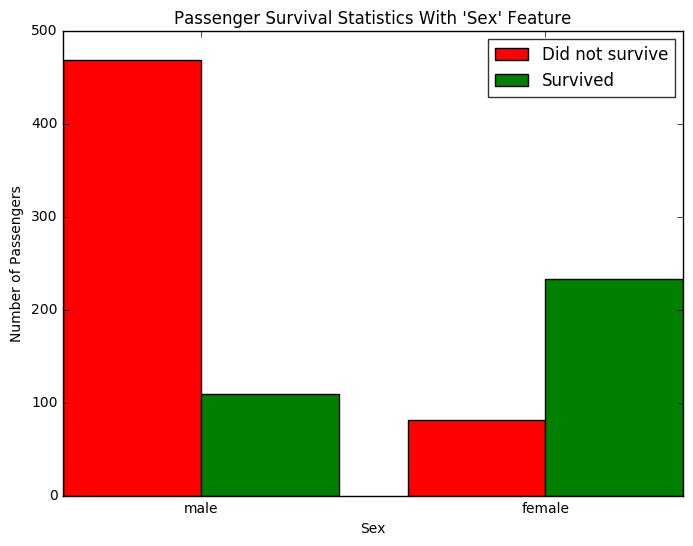

In [9]:
survival_stats(data, outcomes, 'Sex')

Examinando as estatísticas de sobrevivência, a grande maioria de homens não sobreviveu ao naufrágio. Entretanto, a maioria das mulheres *sobreviveu* ao naufrágio. Vamos continuar em cima do nosso modelo anterior: se um passageiro pertence ao gênero feminino, então nós iremos prever que ele vai sobreviver. Do contrário, nós estimaremos que o passageiro não sobreviveu.  
Preencha o código ausente abaixo para que a função faça a estimativa.  
**Dica:** Você pode acessar os valores de cada atributo para um passageiro como em um dicionário. Por exemplo, `passenger['Sex']` é o gênero do passageiro.

In [11]:
def predictions_1(data):
    """ Modelo com uma atributo: 
            - Estimar se o passageiro sobrevive se ele for do gênero feminino. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Eliminar o comando 'pass' abaixo 
        # e escrever as condições do seu modelo aqui
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
            
    # Devolver nossas estimativas
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_1(data)

### Questão 2
*Quão preciso pode ser um modelo que estima que todos os passageiros do gênero feminino sobreviveram e o resto dos passageiros não?*  
**Dica:** Execute o código abaixo para ver a precisão do modelo.

In [12]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 78.68%.


**Resposta**: *Estimativas têm uma precisão de 78.68%.*

***
Utilizando apenas o atributo **Sex** para cada passageiro, nós poderemos aumentar a precisão de nossas estimativas em uma margem significativa. Agora, vamos considerar o uso de um atributo adicional para ver se podemos melhorar ainda mais nossas estimativas. Por exemplo, considerando todos os passageiros do gênero masculino abordo do RMS Titanic: Podemos encontrar um subconjunto desses passageiros que tem maior chance de sobrevivência? Vamos começar olhando a **Age** de cada passageiro do gênero masculino, utilizando novamente a função `survival_stats`. Dessa vez, vamos utilizar um quarto parâmetro para filtrar os dados, assim apenas passageiros com **Sex** masculino serão incluídos.  
Execute a célula de código abaixo para traçar os resultados de sobrevivência dos passageiros do gênero masculino baseado em suas idades.

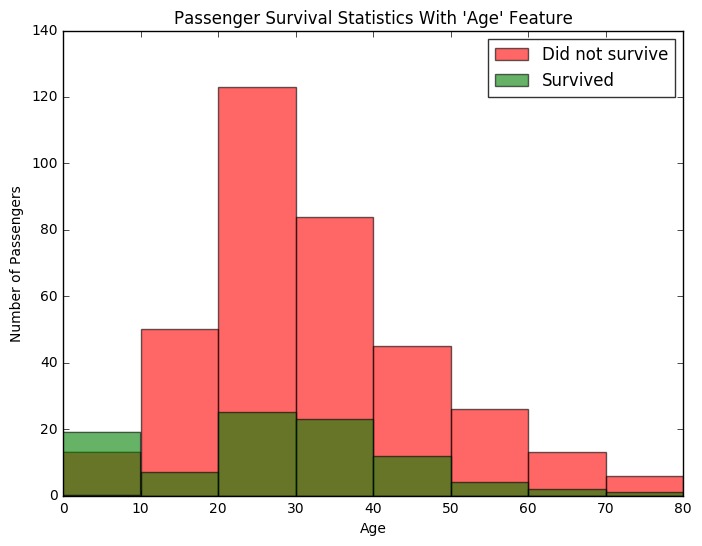

In [13]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examinando as estatísticas de sobrevivência, a maioria dos passageiros do gênero masculino mais jovens que 10 anos sobreviveram ao naufrágio do navio, enquanto que a maioria dos passageiros do gênero masculino de 10 anos de idade ou mais velhos *não sobreviveram* ao naufrágio do navio. Vamos continuar em cima da nosso modelo anterior: se um passageiro for do gênero feminino, então estimaremos que irá sobreviver. Se o passageiro é do gênero masculino e mais jovem que 10 anos, então vamos estimar que ele irá sobreviver. Do contrário, vamos estimar que ele não irá sobreviver.  
Preencha o código ausente abaixo para que a função faça a sua estimativa.  
**Dica:** Você pode começar sua implementação dessa função utilizando o código de estimativa que você escreveu anteriormente em `predictions_1`.

In [34]:
def predictions_2(data):
    """ Modelo com dois atributos: 
            - Estimar a sobrevivência do passageiro se ele for do gênero feminino.
            - Estimar a sobrevivência do passageiro se ele for do gênero masculino e mais jovem do que 10 anos de idade. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Eliminar o comando 'pass' abaixo 
        # e escrever as condições do seu modelo aqui
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    
    # Retornar nossas estimativas
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_2(data)

### Questão 3
*Quão precisa uma estimativa pode ser em que todos os passageiros do gênero feminino e do gênero masculino mais jovens que 10 anos sobreviveram?*  
**Dica:** Execute a célula de código abaixo para ver a precisão desse modelo.

In [35]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 79.35%.


**Resposta**: *Estimativas têm uma precisão de 79.35%.*

***
Adicionando a atributo **Age** como uma condição em conjunto com **Sex**, melhora a estimativa em uma pequena margem, maior do que utilizando o atributo **Sex** sozinha. Agora é a sua vez: Encontre uma série de atributos e condições para separar os dados e obter uma precisão do resultado de sobrevivência de pelo menos 80%. Para isso pode ser necessário múltiplos atributos e múltiplos níveis de declaração de condições para obter sucesso. Você pode utilizar a mesma atributo várias vezes com diferentes condições.   
**Pclass**, **Sex**, **Age**, **SibSp** e **Parch** são algumas sugestões de atributos que você pode utilizar.

Utilize a função `survival_stats` abaixo para examinar várias estatísticas de sobrevivência.  
**Dica:** Para utilizar múltiplos filtros de condições, coloque cada condição na lista passada como último argumento. Exemplo: `["Sex == 'male'", "Age < 18"]`

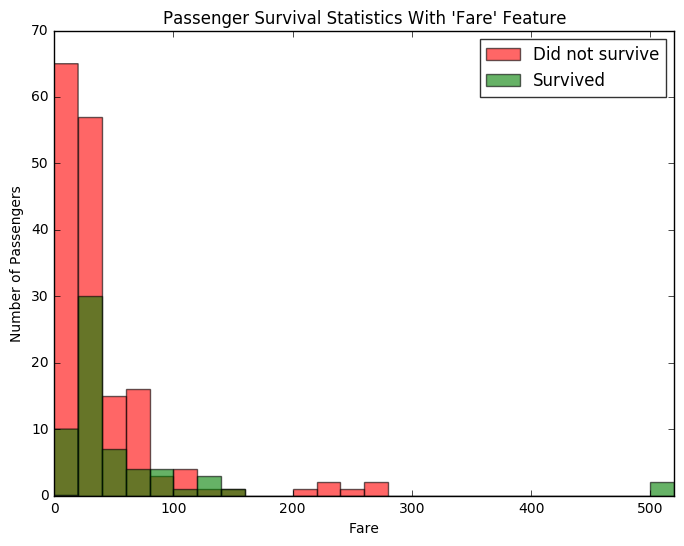

In [111]:
survival_stats(data, outcomes, 'Fare', ["Sex == 'male'", "Pclass < 3"])

Depois de explorar a visualização de estatísticas de sobrevivência, preencha o código ausente abaixo para que a função faça a sua estimativa.  
Documente na sua resposta os vários atributos e condições que você experimentou antes de chegar ao seu modelo de estimativa final.  
**Dica:** Você pode iniciar sua implementação dessa função utilizando o código de estimativa que você escreveu anteriormente em `predictions_2`.

In [104]:
def predictions_3(data):
    """ Modelo com múltiplos atributos. Faz uma estimativa com uma precisão de pelo menos 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Eliminar o comando 'pass' abaixo 
        # e escrever as condições do seu modelo aqui
        if passenger['Age'] < 10:
            predictions.append(1)
        else:
            if passenger['Sex']=='female':
                if passenger['Pclass']<3:
                    predictions.append(1)
                else:
                    if passenger['Embarked'] == 'C' or passenger['Embarked'] == 'Q' or passenger['Age'] < 20:
                        predictions.append(1)
                    else:
                        predictions.append(0)
            else:
                predictions.append(0)
                

    # Retornar nossas estimativas
    return pd.Series(predictions)

# Faz as estimativas
predictions = predictions_3(data)

### Questão 4
*Descreva os passos que você tomou para implementar o modelo de estimativa final para que tenha uma precisão de 80%. Quais atributos você investigou? Alguns atributos eram mais informativos do que os outros? Quais condições você utilizou para separar os resultados de sobrevivência nos dados? Quão precisas são suas estimativas?*  
**Dica:** Execute o código abaixo para ver a precisão da sua estimativa.

In [105]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 81.26%.


**Resposta**: *Estimativas têm uma precisão de 81.26%. 
A partir da segregação inicial: Sexo e Idade > 10 anos parti para uma análise de estratificação do sexo masculino que possui-se alguma probabilidade maior que 50% de sobrevivência, porém os resultados estavam muito desproporcianais para a não sobrevivência. Então, voltei ao grupo feminino em busca de atributos que levassem a morte. A tática utilizada para análise basicamente era: para um dado conjunto de restrições eu alterava os dados do eixo x do gráfico, essas alterações passavam algumas idéias de tendências ou de grupos a serem explorados.*

# Conclusão

Depois de muitas iterações explorando e condicionando os dados, você construiu um algoritmo útil para estimar a sobrevivência de cada passageiro abordo do RMS Titanic. A técnica aplicada neste projeto é uma implementação manual de um modelo simples de machine learning, a *árvore de decisão*. A árvore de decisão separa um conjunto de dados em pedaços cada vez menores (chamados de *nós*), ao utilizar um atributo de cada vez. Cada vez que um conjunto de dados é separado, nossas estimativas tornam-se mais precisas, como se cada um dos subgrupos resultantes se tornasse mais homogêneo (contendo classes similares) do que antes. A vantagem de ter um computador fazendo coisas por nós é que ele pode ser levado a exaustão e obter resultados mais preciso do que nossa exploração manual acima. [Este link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) fornece outra introdução em machine learning utilizando a árvore de decisão.

A árvore de decisão é apenas um de muitos modelos que vem da *aprendizagem supervisionada*. Na aprendizagem supervisionada, nós tentamos utilizar atributos dos dados para estimar ou modelar coisas com resultados objetivos classificadas. Dito isso, cada um dos pontos dos nossos dados tem um valor de resultado conhecido, como uma categórica, discreta classe como `'Survived'`, ou um número, um valor contínuo como estimar o valor de uma casa.

### Questão 5
*Pense em uma situação do mundo real em que a aprendizagem supervisionada pode ser aplicada. O que seria o resultado variável que você está tentando estimar? Nomeie dois atributos sobre os dados utilizados nessa situação que possam ser úteis para fazer as estimativas.*  

**Resposta**: *Pacientes que dão entrada em um hospital e vão a óbito. Variáveis selecionadas: Sintoma, horário da entrada e Funcionário que prestou o primeiro atendimento*

> **Nota**: Uma vez que você tenha completado todas as implementações de código e tenha respondido todas as questões acima com sucesso, você pode finalizar seu trabalho exportando o iPhyton Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizando junto com o Notebook como a sua submissão.